In [1]:
from datetime import datetime as dt
time_start = dt.today()

import pandas as pd
#import main_module
%run main_module.ipynb

#import PyQt5 # для графиков в отдельных картинках
#%matplotlib qt  

%matplotlib inline

In [2]:
# Перевод сигнала из файла .prs в рабочей директрории ASTRO в файл sig.txt
!del "sig.txt"
!HardDecoder.exe "C:\HOLTWIN_mian\RWORK\DATA\c0000001.prs" sig.txt 

File 0x91D5BD long loaded at 0x140e040 - 0x1d2b5fd
Created new memory 0xa92000 long at 0x1d3e040 - 0x41746496
0 0 0 0 0 0 0 0 
-4 -34 -190 2047 -46 -28 -19 -9 
0 -23 -114 2047 -33 -22 -15 -8 
2 -18 -73 -2048 -26 -20 -12 -7 
1 -14 -51 -2048 -20 -17 -10 -7 
2 -12 -38 -2048 -18 -15 -7 -6 
1 -10 -29 -2048 -13 -12 -7 -5 
2 -7 -23 -2048 -12 -12 -7 -5 
2 -7 -20 -2048 -10 -10 -7 -5 
1 -6 -18 -1605 -9 -10 -5 -5 
2 -5 -15 -1053 -7 -9 -5 -5 
2 -5 -14 -720 -7 -9 -4 -4 
1 -5 -13 -514 -7 -7 -4 -5 
1 -5 -12 -383 -5 -7 -5 -5 
2 -3 -10 -298 -5 -7 -4 -5 
2 -3 -9 -240 -4 -7 -4 -4 
2 -4 -9 -201 -3 -5 -4 -5 
1 -3 -9 -170 -4 -5 -2 -4 
1 -4 -7 -148 -4 -5 -2 -4 
0 -4 -7 -132 -3 -5 -3 -4 
0 -4 -7 -117 -2 -5 -1 -4 
1 -2 -7 -105 -3 -5 -2 -4 
1 -2 -6 -96 -2 -4 -2 -3 
-704 -708 -700 -786 -688 -682 1065 1057 
-315 -330 -327 -423 -315 -314 479 467 
-147 -160 -160 -256 -151 -151 224 213 
-70 -80 -83 -173 -76 -76 108 100 
-34 -44 -45 -129 -40 -42 54 49 
-18 -25 -28 -103 -23 -25 28 24 
-10 -15 -18 -87 -13 -15 16 12 
-5

## Чтение и подготовка

In [3]:
type_h = 'HE12BP'
#type_h = 'HE12N'

testing_record = record(r"sig.txt", holter_type=type_h, amplitude_convert = 330)

croped: 1200000


len: 1200000


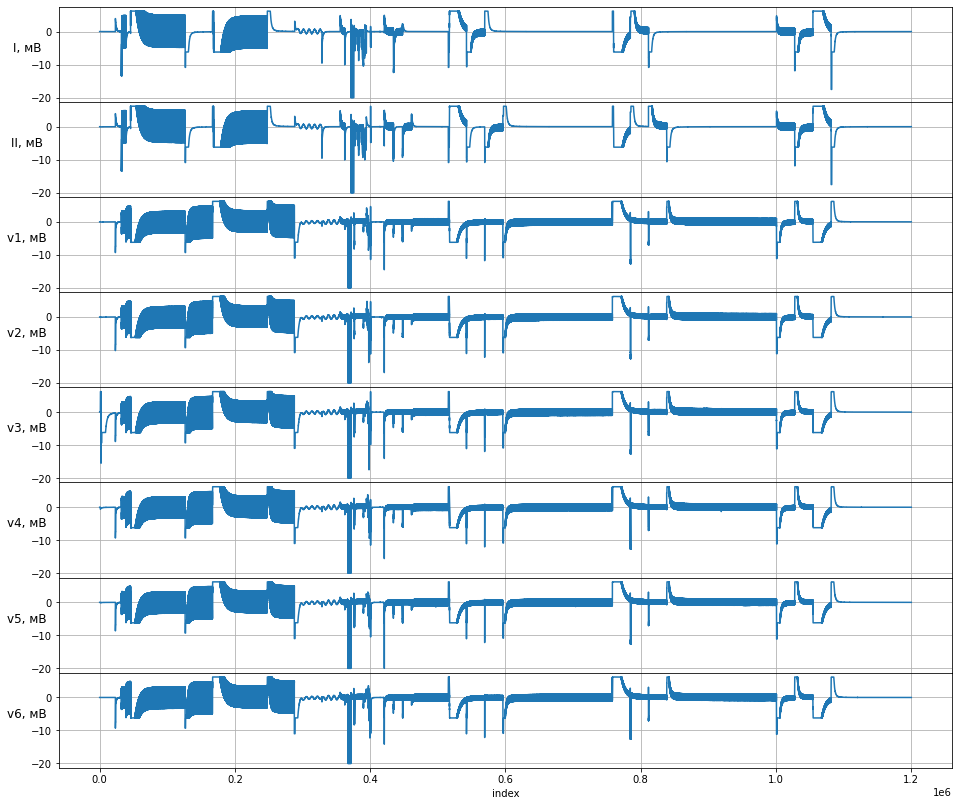

In [4]:
testing_record.plot()

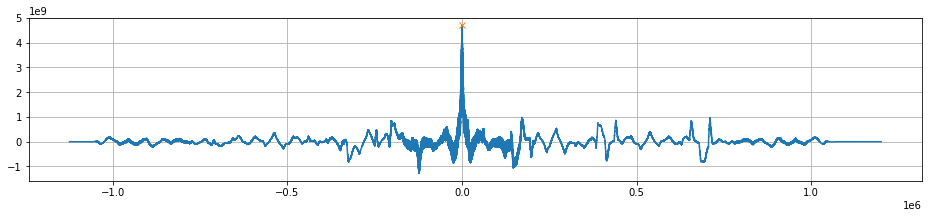

index lag: 605


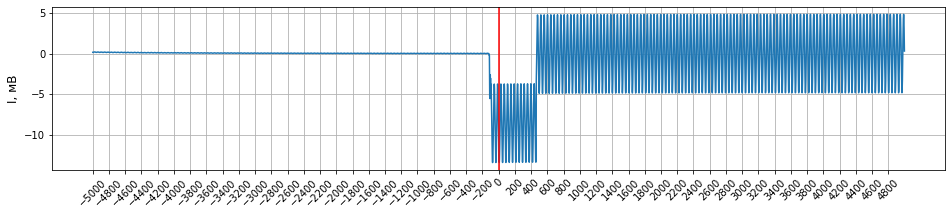

In [25]:
testing_record.find_index_lag(offset=600, plot_corr=True)
print('index lag:' ,testing_record.index_lag)
testing_record.calibrate_index_lag()
testing_record.split_channels()

In [26]:
# testing_record.plot_segment(n_seg=35, border=0.0)

In [27]:
# # Построение участков
# i_seg = 3
# border = 0.2

# begin = testing_record.time_limits[i_seg][1] + testing_record.index_lag
# end = testing_record.time_limits[i_seg][2] + testing_record.index_lag
# print('Segment:' ,testing_record.time_limits[i_seg][0])
# testing_record.find_segment_limits(begin, end, border)

## Тесты

In [28]:
tests_rezult_pd = pd.DataFrame(columns=['Test_name','Passed_test' ,'Returned_values', 'Spikes'])

Максимальный размах записи:    0.31 мВ
Максимально допустимый размах: 0.02 мВ
[0.01, 0.013, 0.012, 0.011, 0.31, 0.015, 0.013, 0.01]


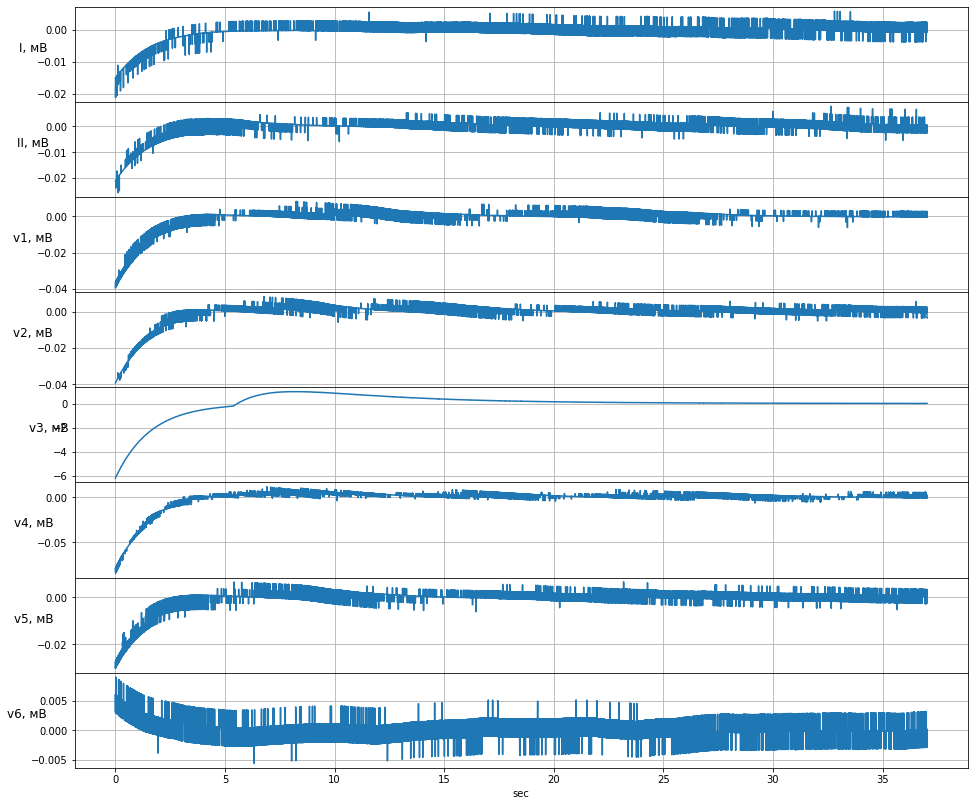

In [29]:
# Шум
values = nose_test(testing_record, max_nose = 0.02, filtred=True)
tests_rezult_pd.loc[0] = [ 'Nose test', max(values)<0.02  , values, pd.NA ]

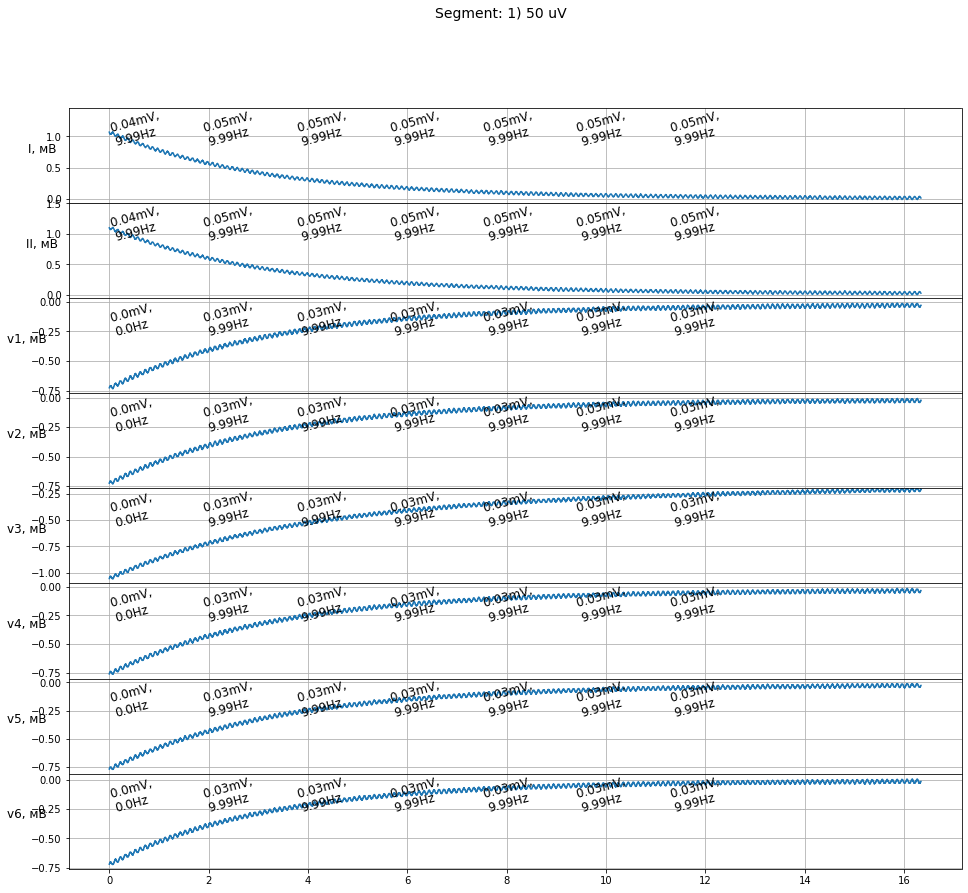

[0.05, 0.05, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]


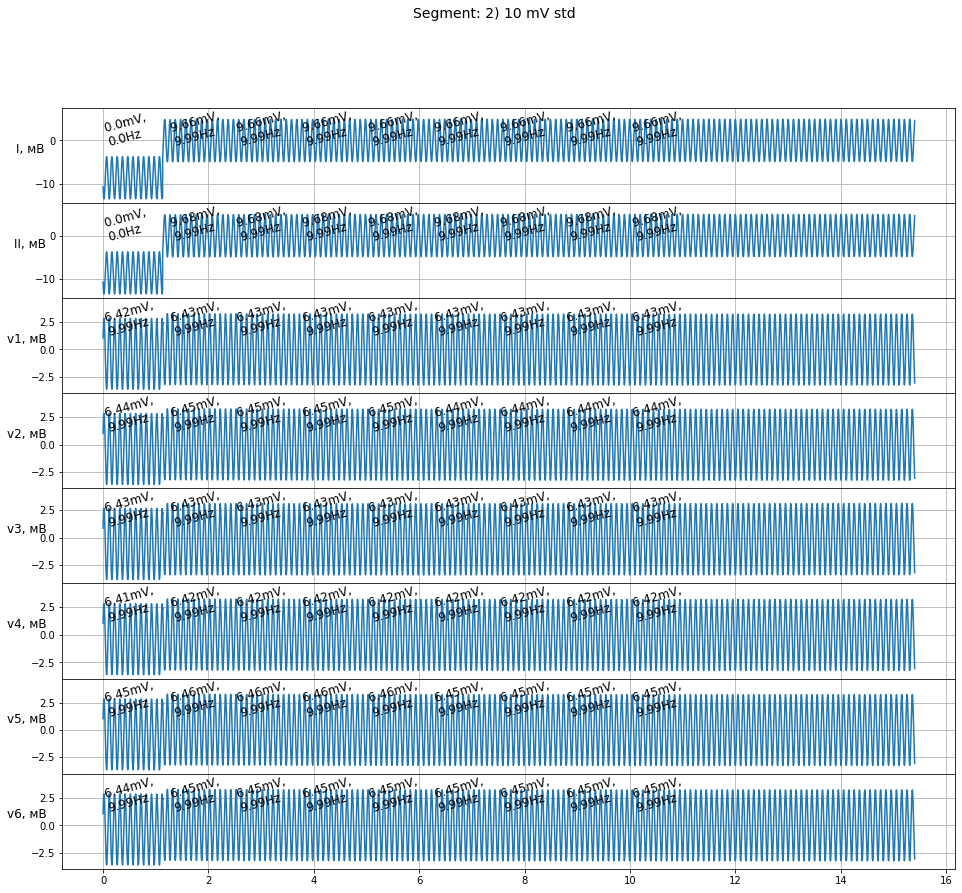

[9.66, 9.68, 6.43, 6.44, 6.43, 6.42, 6.45, 6.45]


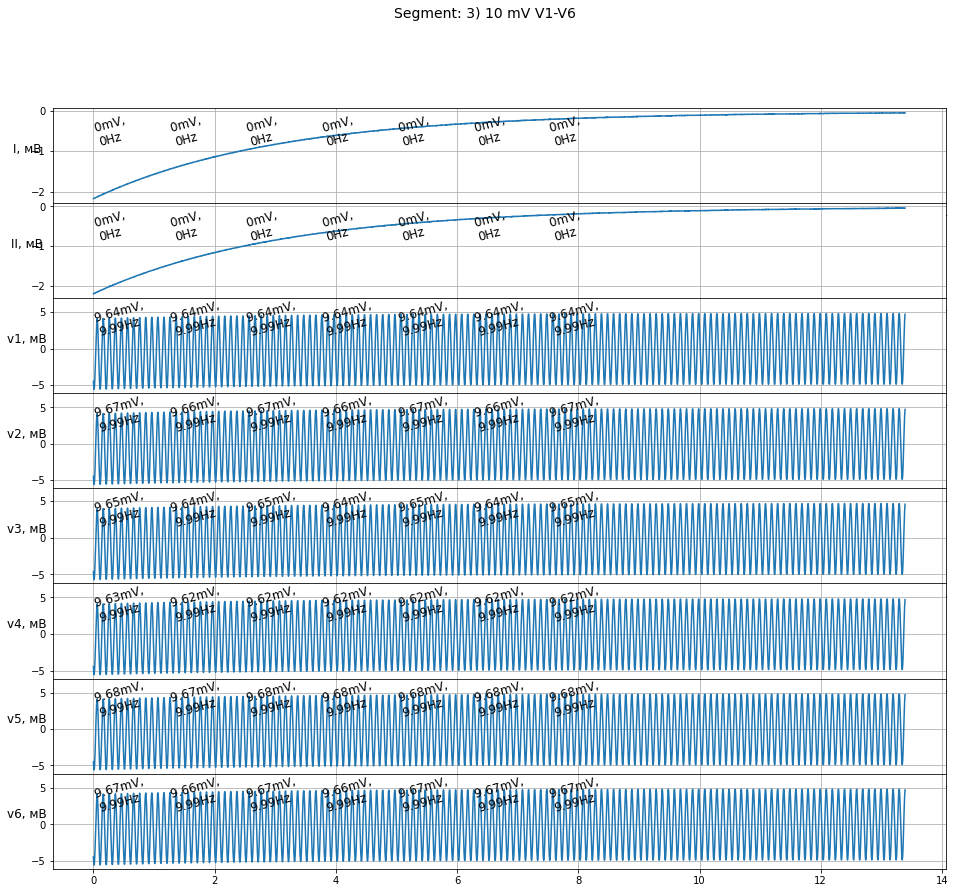

[0.0, 0.0, 9.63, 9.66, 9.64, 9.61, 9.67, 9.66]


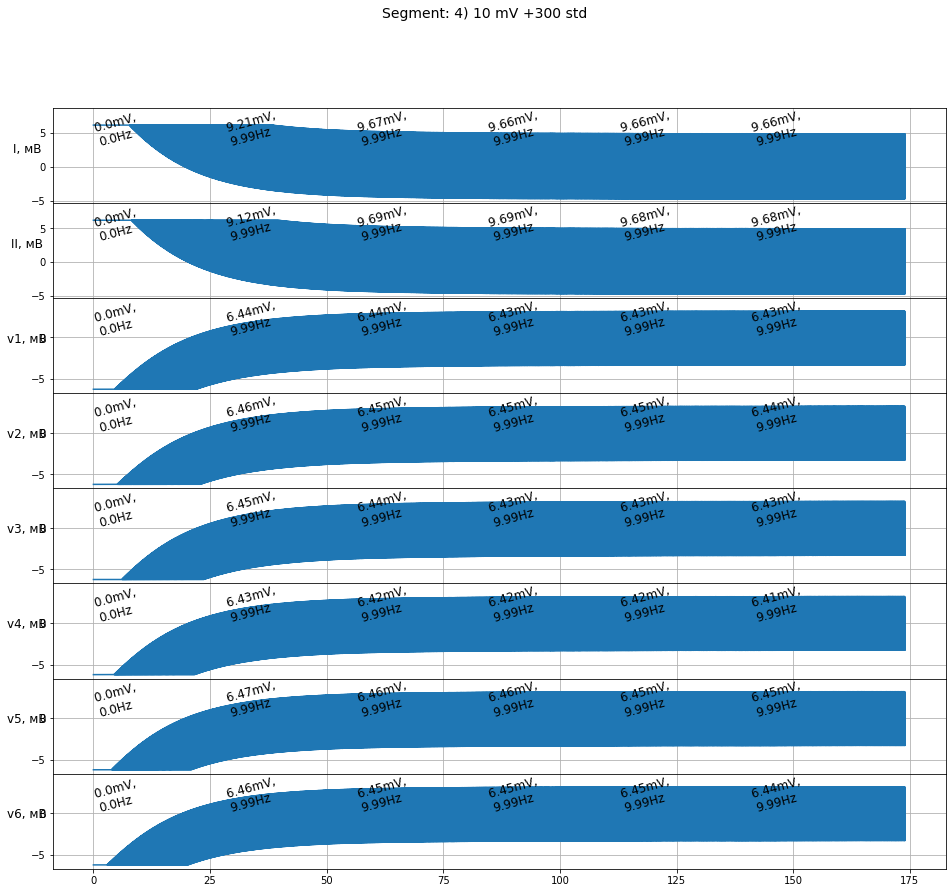

[9.66, 9.68, 6.43, 6.45, 6.43, 6.42, 6.46, 6.45]


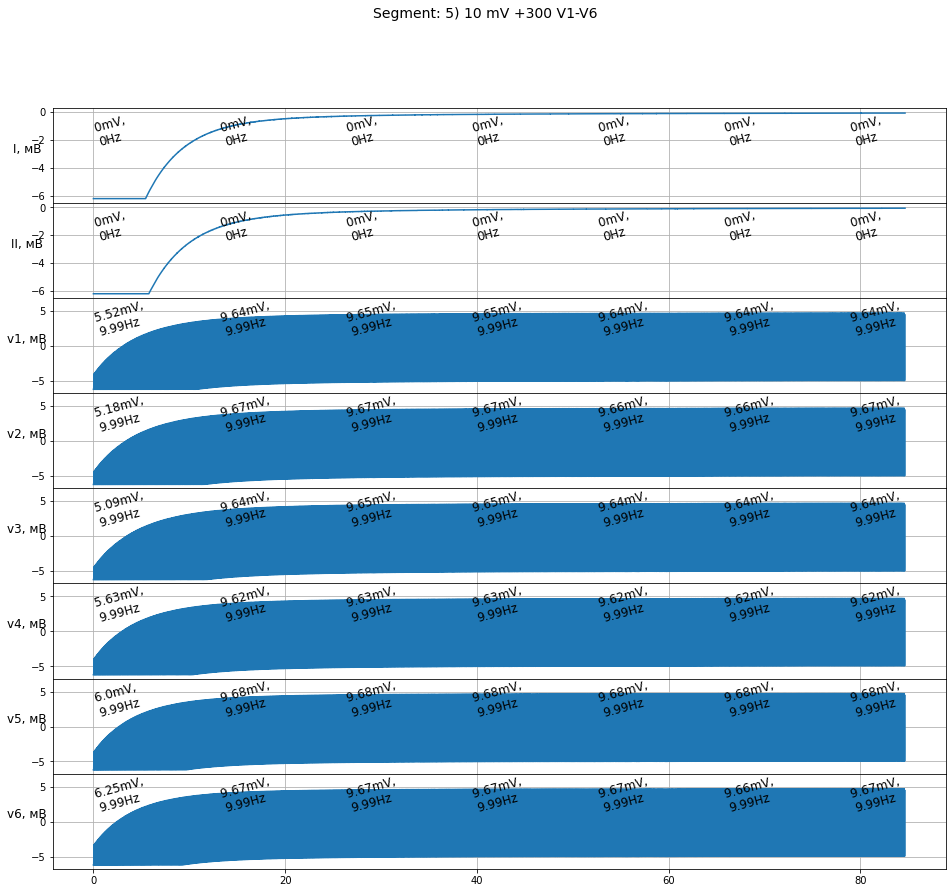

[0.0, 0.0, 9.64, 9.66, 9.64, 9.62, 9.68, 9.67]


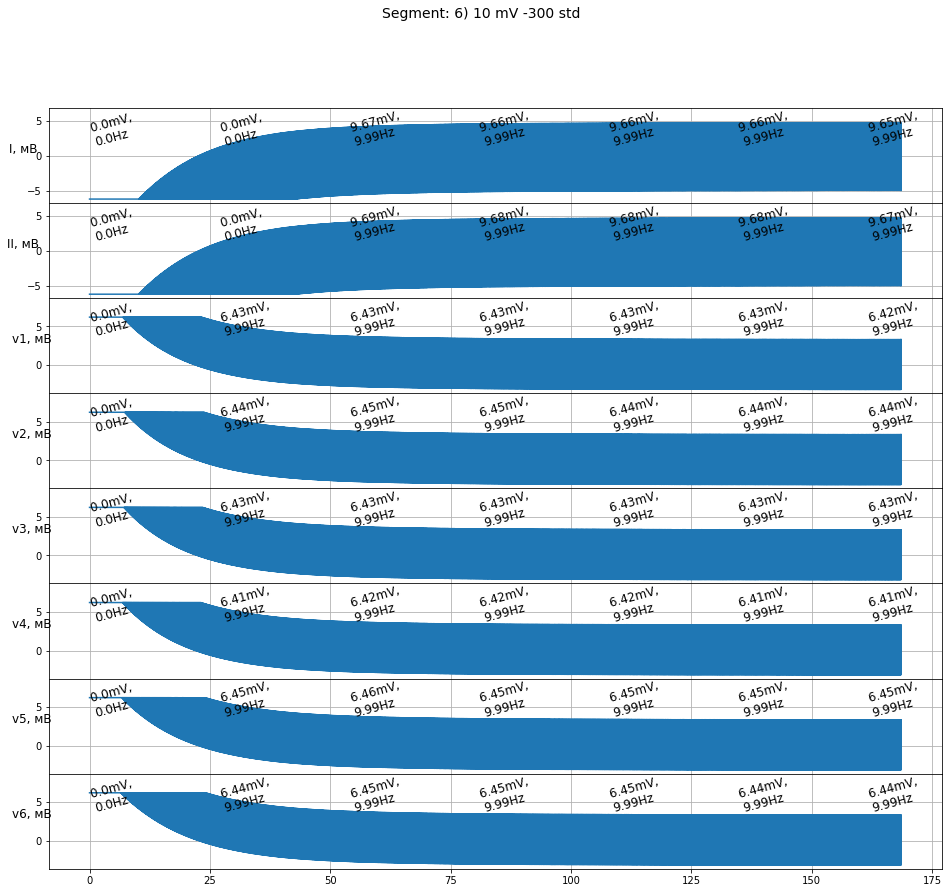

[9.66, 9.68, 6.43, 6.44, 6.43, 6.42, 6.45, 6.45]


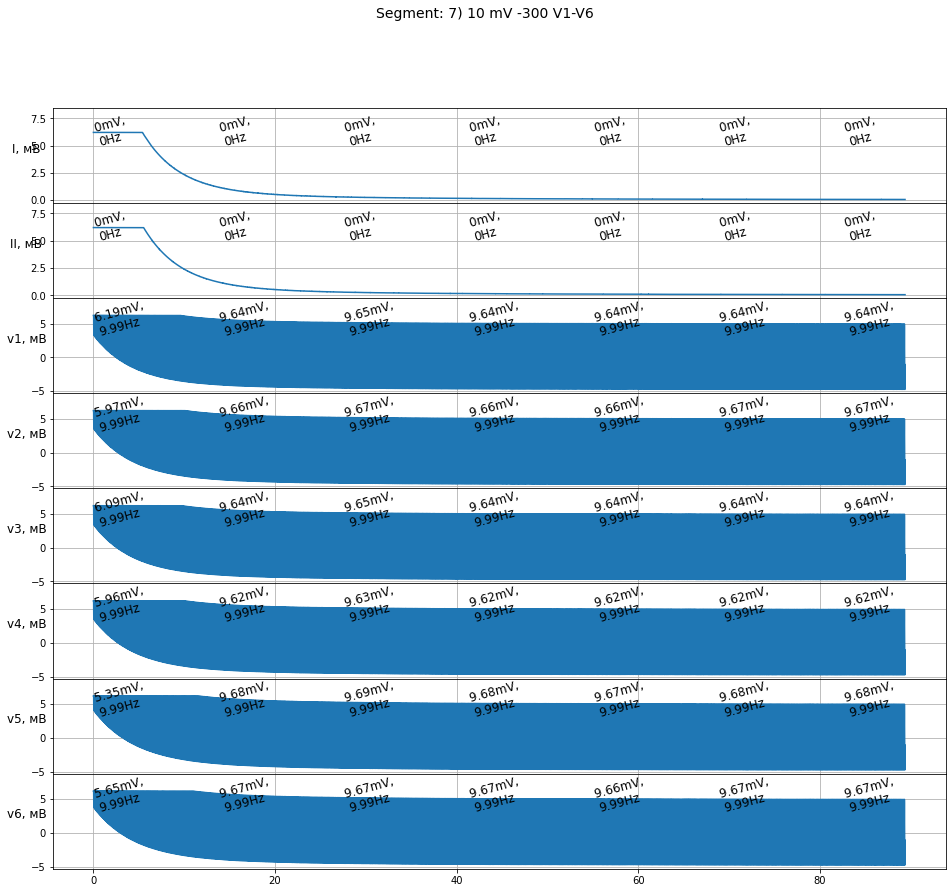

[0.0, 0.0, 9.64, 9.66, 9.64, 9.62, 9.68, 9.67]


In [30]:
# Амплитуды
values, spikes =  amplitude_test(testing_record, n_seg = 1, peaks_height= 0.03, check_spike=False)
passed_test = min(values) > 0
tests_rezult_pd.loc[1] = [ 'Amp test 50 uV', passed_test  , values, pd.NA]

#-----
values_std, spikes_std = amplitude_test(testing_record, n_seg = 2)
values_v1_v6, spikes_v1_v6 = amplitude_test(testing_record, n_seg = 3)

values = values_std[0:2] + values_v1_v6[2:]
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values) - 10)< 10*0.05)==1
tests_rezult_pd.loc[2] = [ 'Amp test 10 mV', passed_test  , values, spikes]

#------
values_std, spikes_std = amplitude_test(testing_record, n_seg = 4)
values_v1_v6, spikes_v1_v6 = amplitude_test(testing_record, n_seg = 5)

values = values_std[0:2] + values_v1_v6[2:]
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values) - 10)< 10*0.05)==1
tests_rezult_pd.loc[3] = [ 'Amp test 10 mV +300 mV', passed_test  , values, spikes]

#-----
values_std, spikes_std = amplitude_test(testing_record, n_seg = 6)
values_v1_v6, spikes_v1_v6 = amplitude_test(testing_record, n_seg = 7)

values = values_std[0:2] + values_v1_v6[2:]
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values) - 10)< 10*0.05)==1
tests_rezult_pd.loc[4] = [ 'Amp test 10 mV -300 mV', passed_test  , values, spikes]


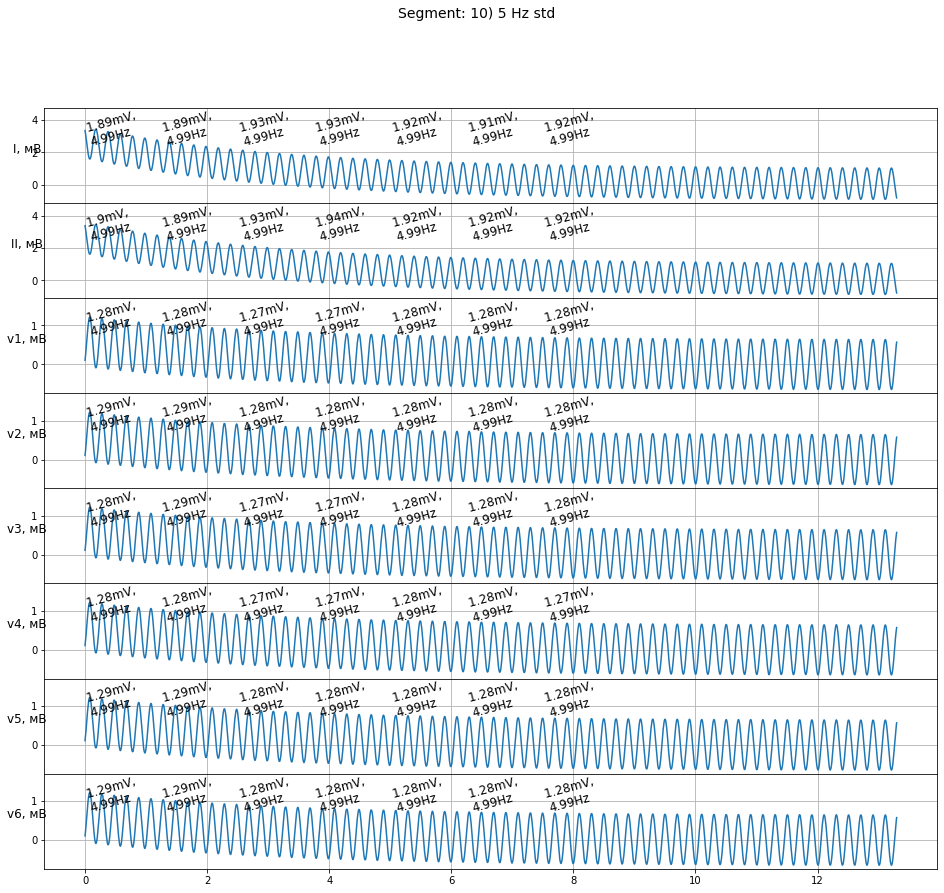

[1.92, 1.92, 1.28, 1.28, 1.28, 1.27, 1.28, 1.28]


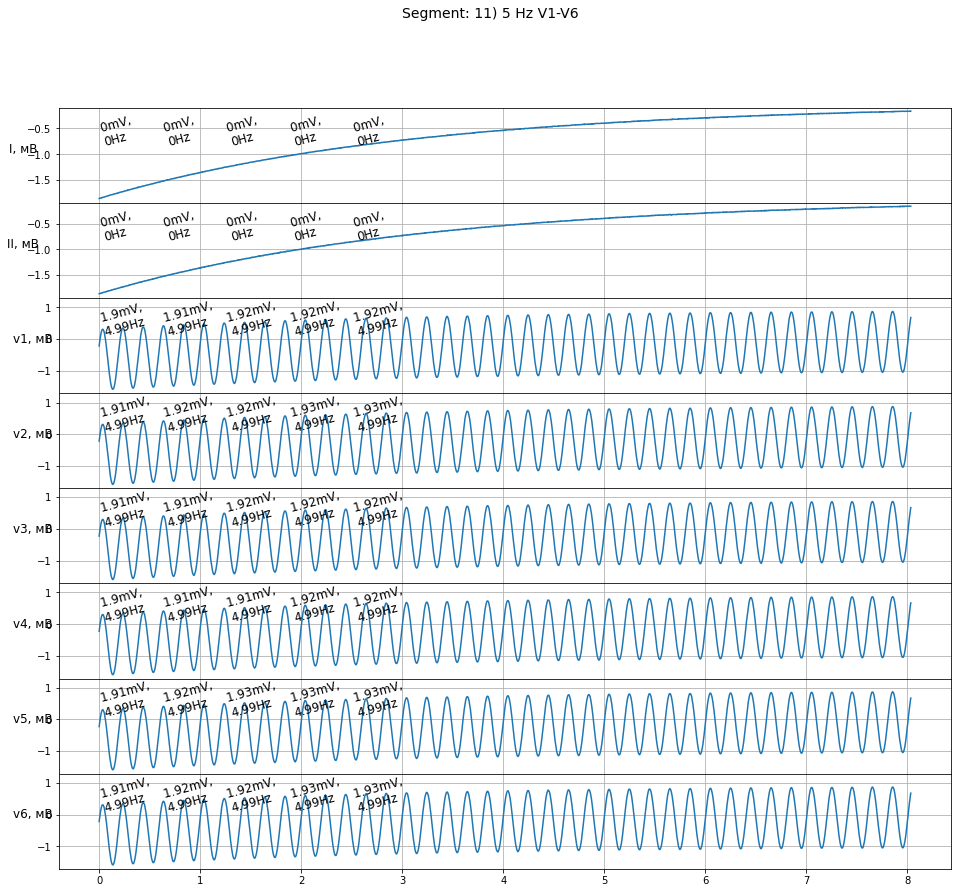

[0.0, 0.0, 1.92, 1.92, 1.92, 1.91, 1.93, 1.92]


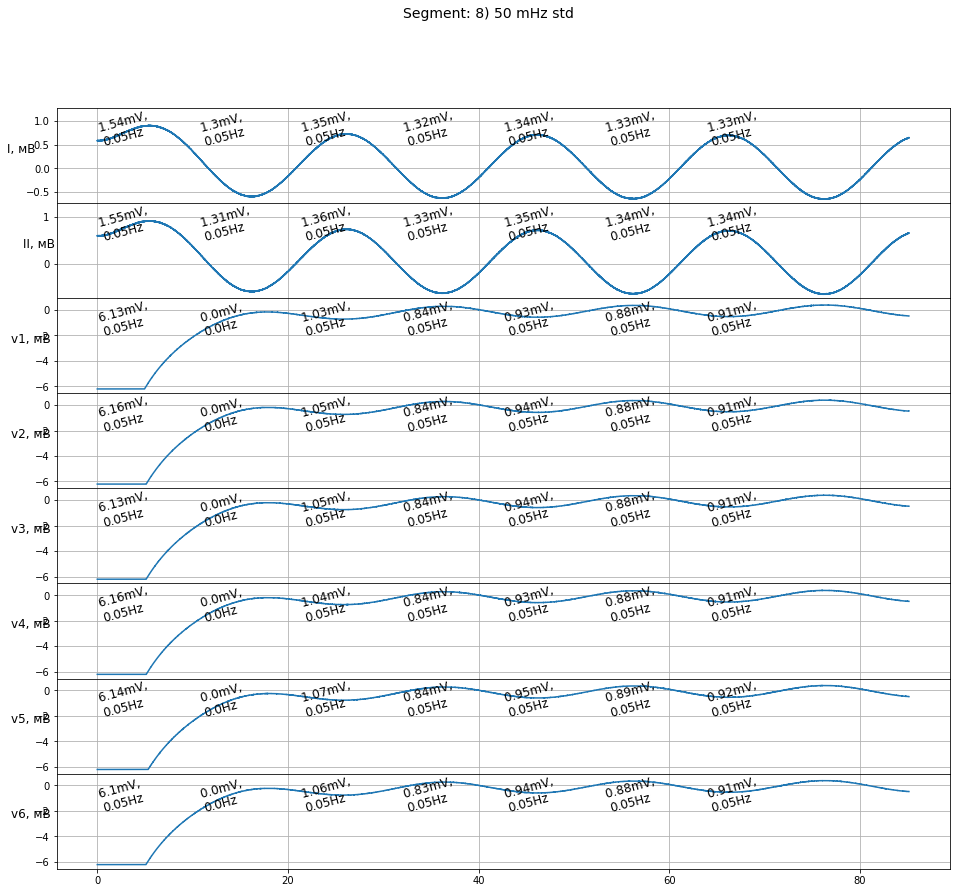

[1.33, 1.35, 0.91, 0.91, 0.92, 0.91, 0.92, 0.91]


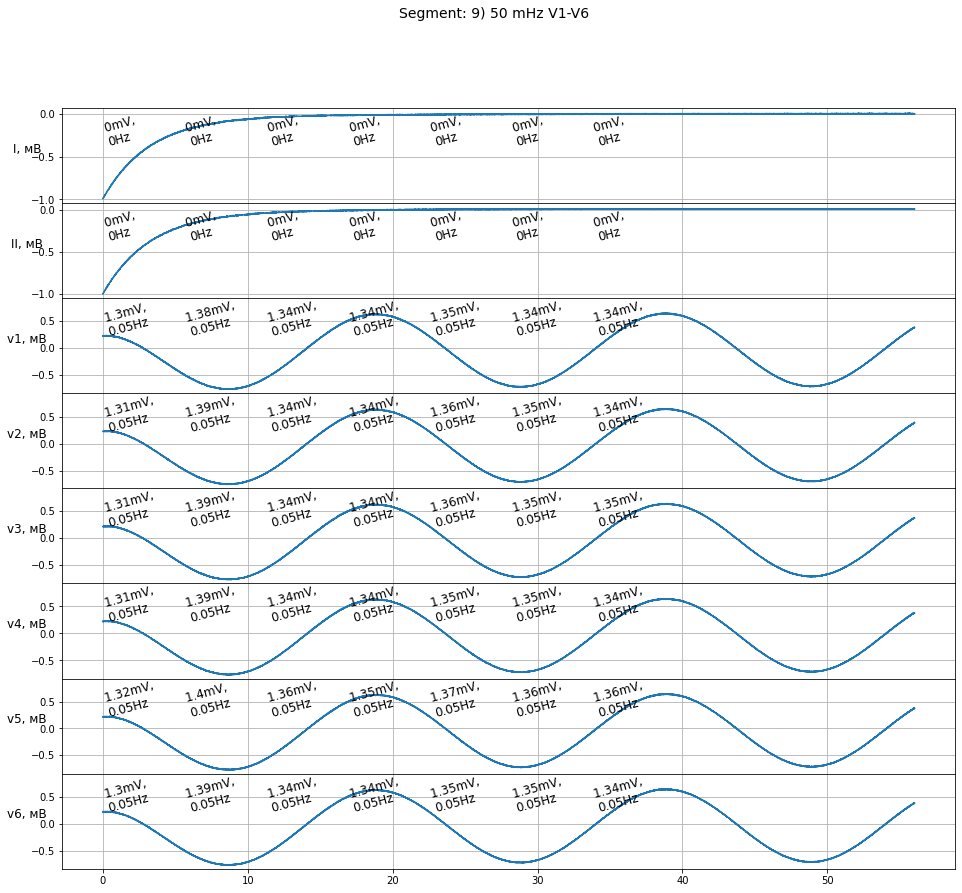

[0.0, 0.0, 1.34, 1.34, 1.35, 1.34, 1.36, 1.34]


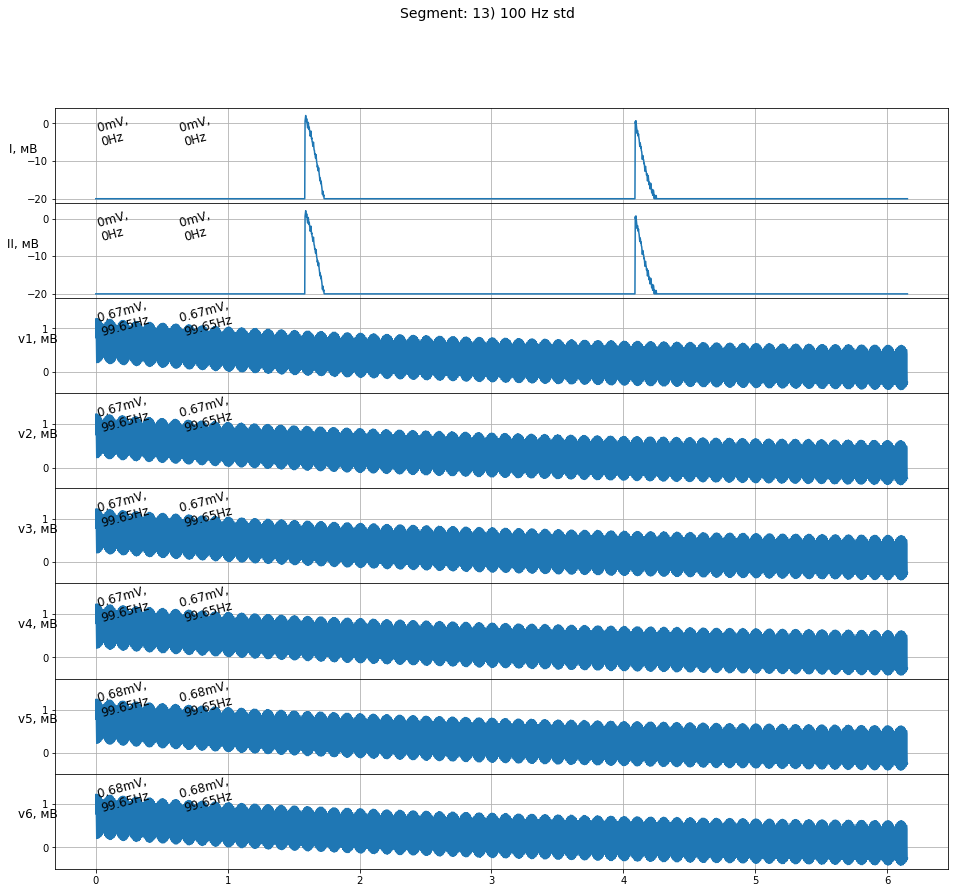

[0.0, 0.0, 0.67, 0.67, 0.67, 0.67, 0.68, 0.68]


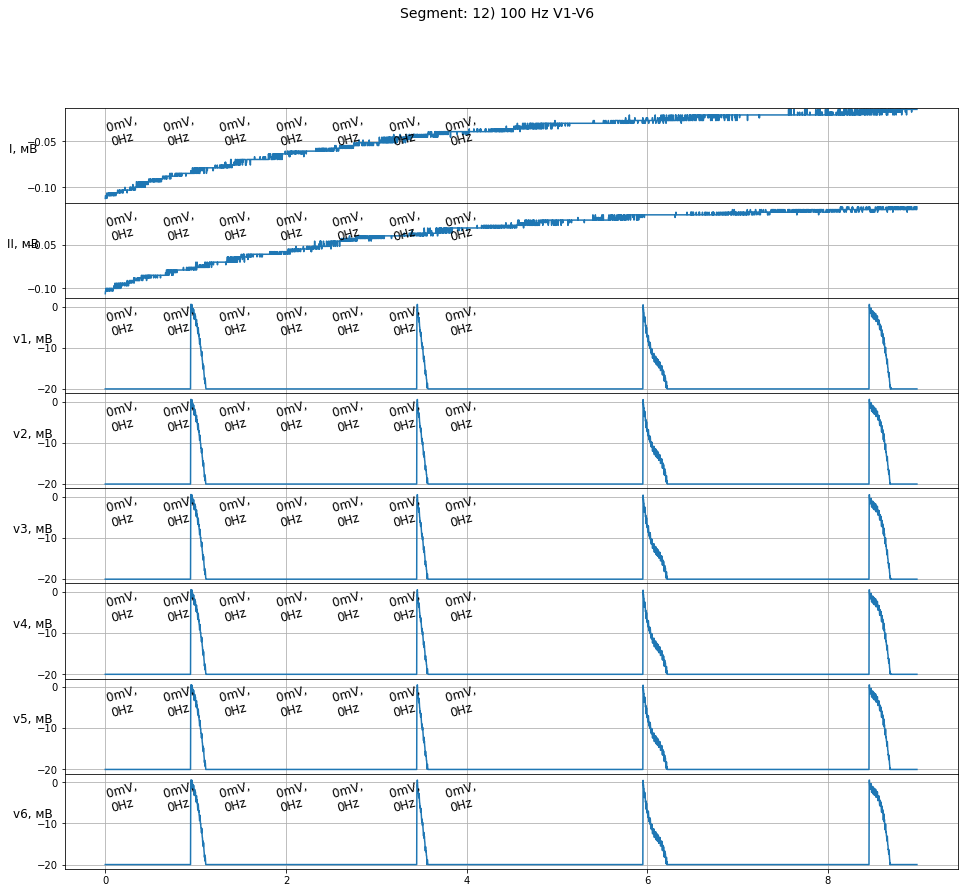

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [31]:
# Частоты
values_std, spikes_std = amplitude_test(testing_record, n_seg = 10)
values_v1_v6, spikes_v1_v6 = amplitude_test(testing_record, n_seg = 11)

values = values_std[0:2] + values_v1_v6[2:]
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values) - 2)< 2*0.05)==1
tests_rezult_pd.loc[5] = [ 'frequency response 5 Hz', passed_test  , values, spikes]

#-----
values_std, spikes_std = amplitude_test(testing_record, n_seg = 8, window_size = 2**13)
values_v1_v6, spikes_v1_v6 = amplitude_test(testing_record, n_seg = 9, window_size = 2**13)

values = values_std[0:2] + values_v1_v6[2:]
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(values > np.median(tests_rezult_pd.loc[5][2])*0.7)==1
tests_rezult_pd.loc[6] = [ 'frequency response 50 mHz', passed_test  , values, spikes]

#-----
values_std, spikes_std = amplitude_test(testing_record, n_seg = 13, check_spike=False)
values_v1_v6, spikes_v1_v6 = amplitude_test(testing_record, n_seg = 12, check_spike=False)

values = values_std[0:2] + values_v1_v6[2:]
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(values > np.median(tests_rezult_pd.loc[5][2])*0.7)==1
tests_rezult_pd.loc[7] = [ 'frequency response 100 Hz', passed_test  , values, pd.NA]


I, max = 1.57 sec, min = 0.963 sec
II, max = 1.968 sec, min = 0.963 sec
v1, max = 1.007 sec, min = 1.002 sec
v2, max = 1.007 sec, min = 1.002 sec
v3, max = 1.007 sec, min = 1.002 sec
v4, max = 1.007 sec, min = 1.002 sec
v5, max = 1.007 sec, min = 1.002 sec
v6, max = 1.007 sec, min = 1.002 sec
Прохождение испытания: False


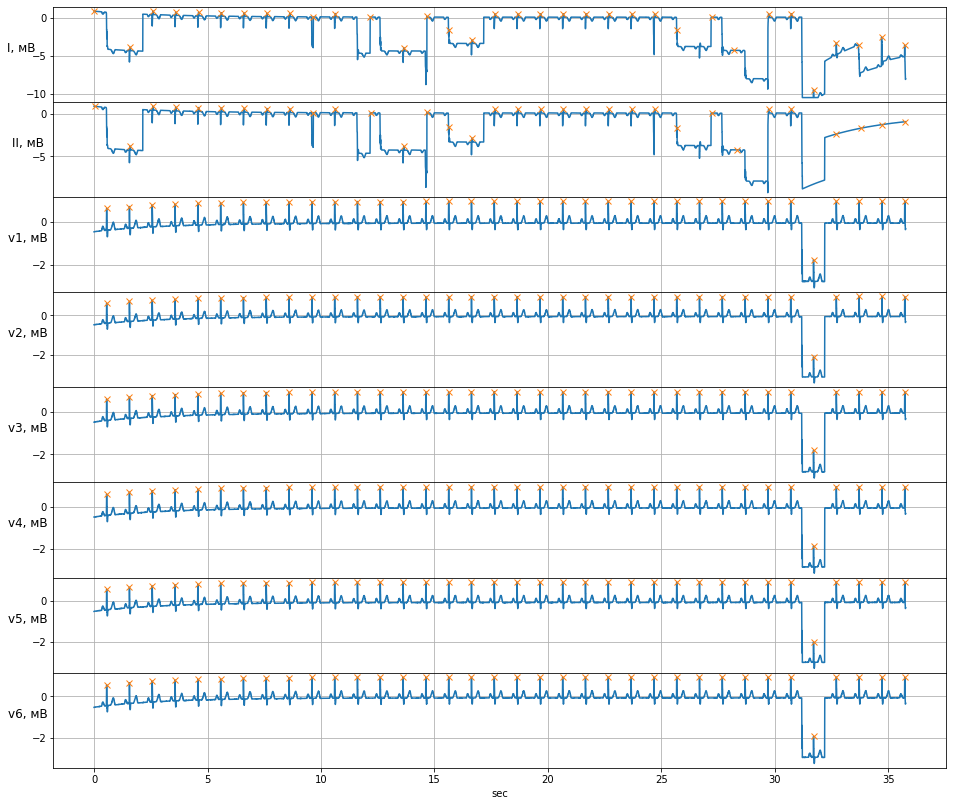

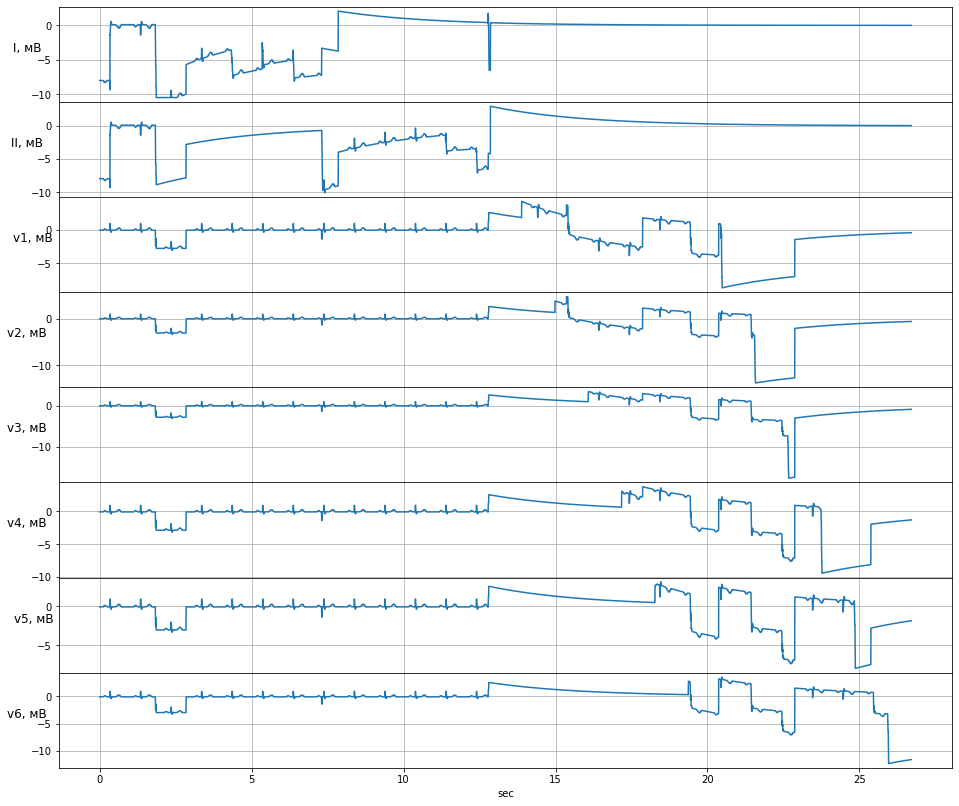

In [32]:
# ЭКГ/время
passed_test = ECG_test(testing_record, n_seg = 14)
tests_rezult_pd.loc[8] = [ 'ECG test', passed_test  , pd.NA, pd.NA]

Segment: 16) Доп. ток
I, max = 0.09 мВ, min = -0.11 мВ
II, max = 0.08 мВ, min = -0.05 мВ
v1, max = 0.05 мВ, min = -0.08 мВ
v2, max = 0.04 мВ, min = -0.32 мВ
v3, max = 0.05 мВ, min = -0.02 мВ
v4, max = 0.05 мВ, min = -0.08 мВ
v5, max = 0.05 мВ, min = -0.06 мВ
v6, max = 0.05 мВ, min = -0.21 мВ
Прохождение испытания: True


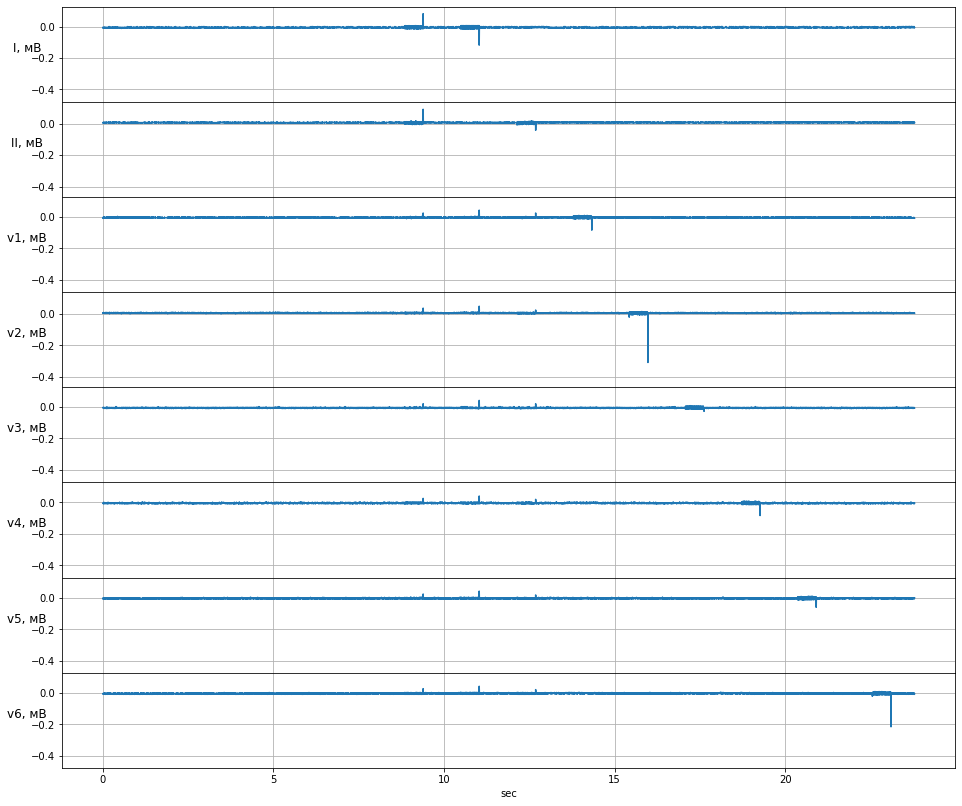

In [33]:
# Доп. ток
passed_test, values = doptok_test(testing_record, n_seg = 16)
tests_rezult_pd.loc[9] = [ 'Doptok_test', passed_test  , values, pd.NA]

Значения напряжения: [[1.904, 1.907], [1.903, 1.911], [1.906, 1.907]]
Полученные входные сопротивления: [346, 143, 1077]


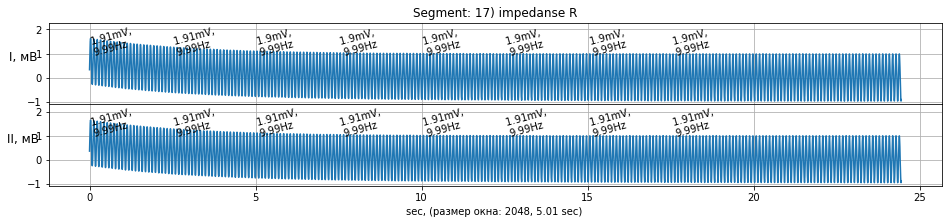

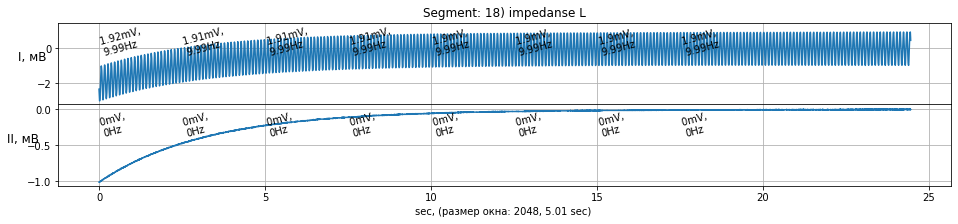

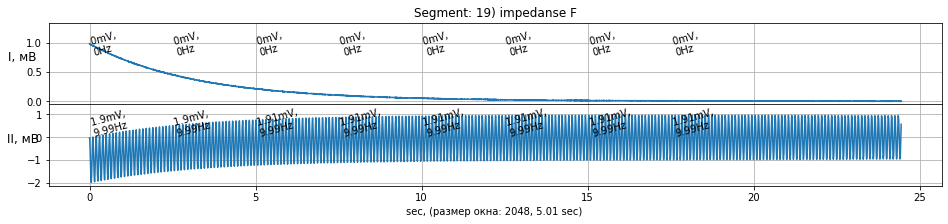

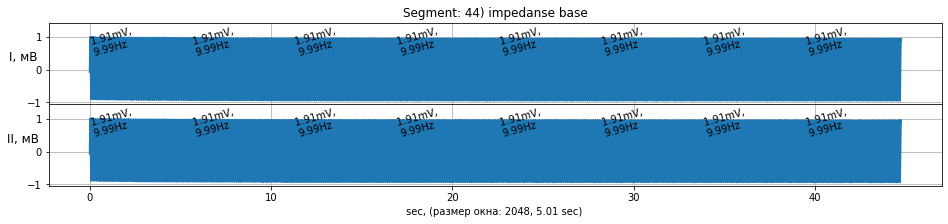

Значения напряжения: [[1.9, 1.905], [1.905, 1.91], [1.9, 1.904], [1.896, 1.901], [1.908, 1.912], [1.905, 1.91]]
Полученные входные сопротивления: [234, 261, 273, 249, 269, 225]


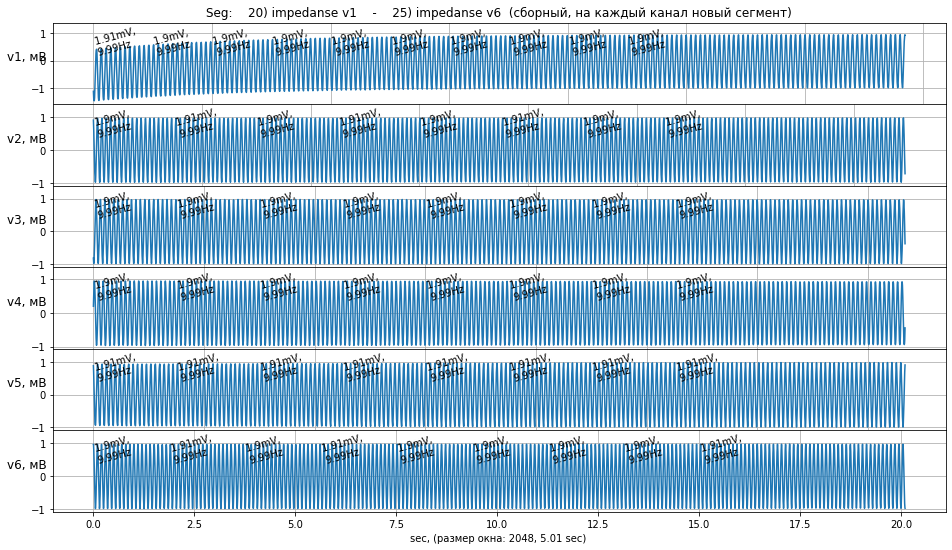

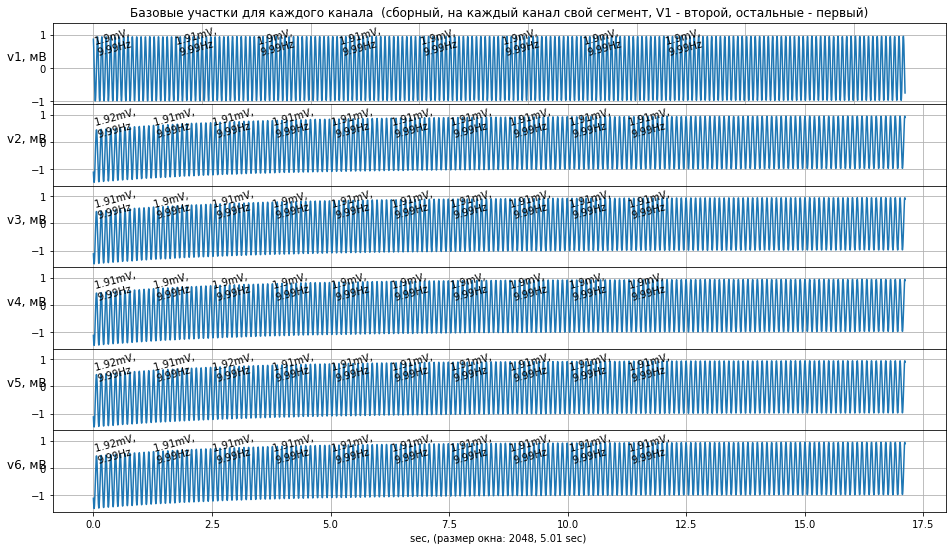

In [34]:
# Входные сопротивления
values_std, spikes_std = impedanse_12_std(testing_record, n_seg = 17, plot_base=True)
values_v1_v6, spikes_v1_v6 = impedanse_12_v1_v6(testing_record, n_seg = 20, plot_base=True)

values = values_std + values_v1_v6
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values)) > 50)==1
tests_rezult_pd.loc[10] = [ 'Impedanse test', passed_test  , values, spikes]

Значения напряжения: [[1.908, 1.912], [1.905, 1.916], [1.91, 1.912]]
Полученные входные сопротивления: [337, 114, 760]


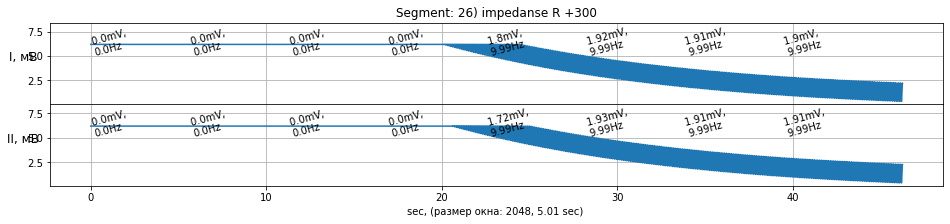

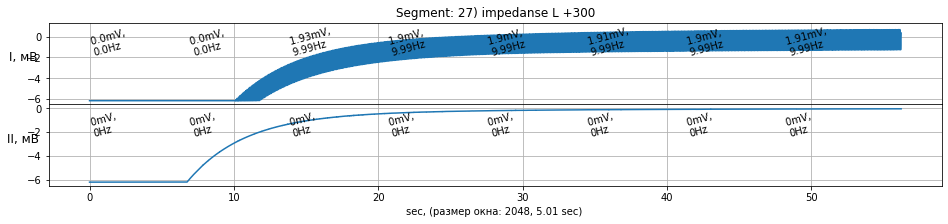

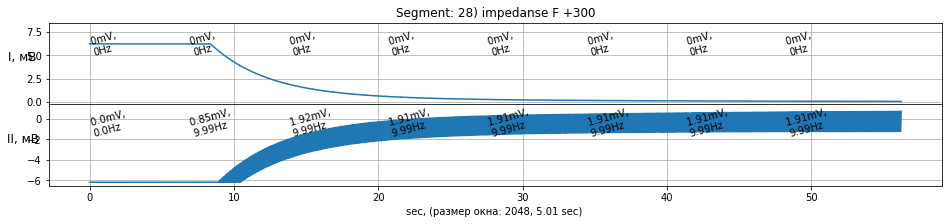

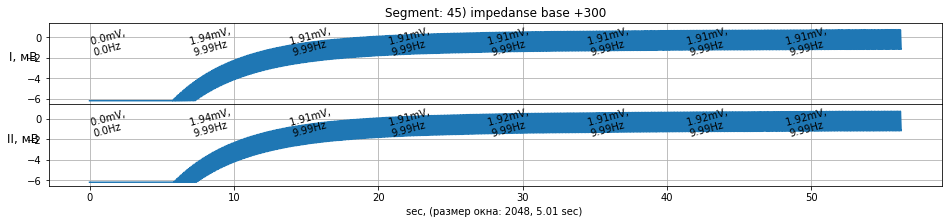

Значения напряжения: [[1.903, 1.908], [1.909, 1.912], [1.903, 1.907], [1.897, 1.903], [1.909, 1.914], [1.906, 1.912]]
Полученные входные сопротивления: [217, 334, 276, 202, 209, 203]


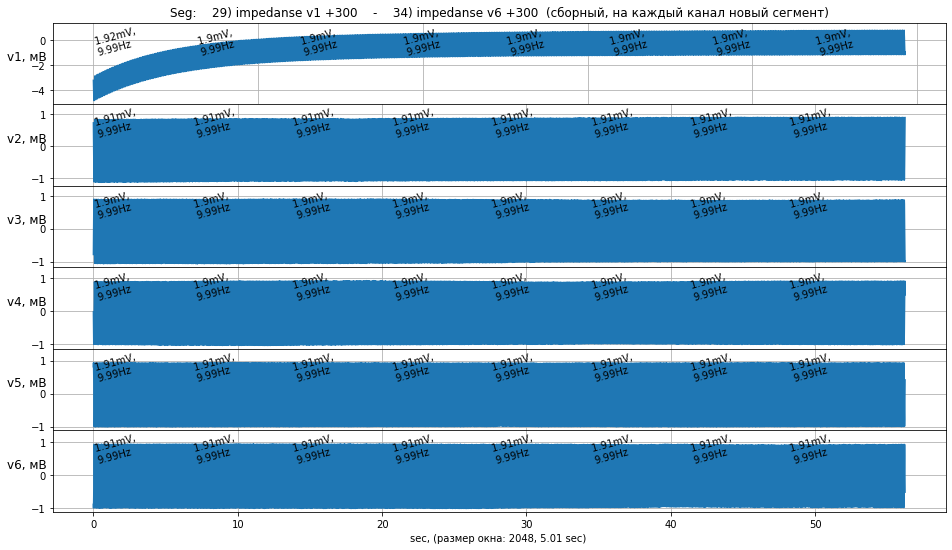

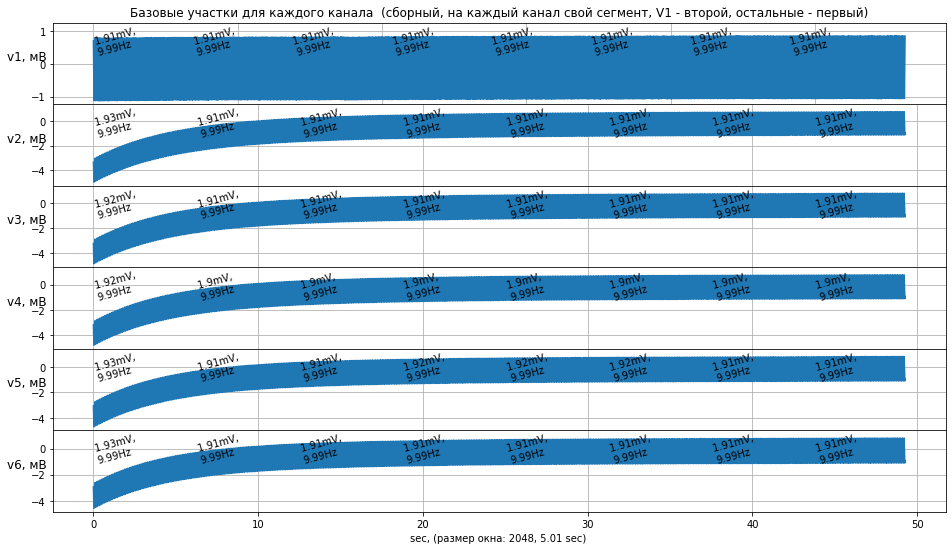

In [35]:
# Входные сопротивления +300 мВ
values_std, spikes_std = impedanse_12_std(testing_record, n_seg = 26, plot_base=True)
values_v1_v6, spikes_v1_v6 = impedanse_12_v1_v6(testing_record, n_seg = 29, plot_base=True)

values = values_std + values_v1_v6
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values)) > 50)==1
tests_rezult_pd.loc[11] = [ 'Impedanse test +300 mV', passed_test  , values, spikes]

Значения напряжения: [[1.904, 1.91], [1.905, 1.915], [1.908, 1.91]]
Полученные входные сопротивления: [182, 123, 664]


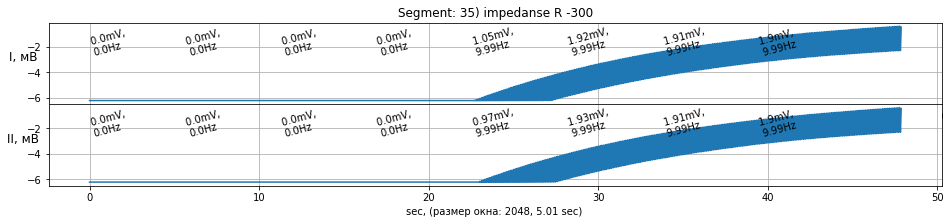

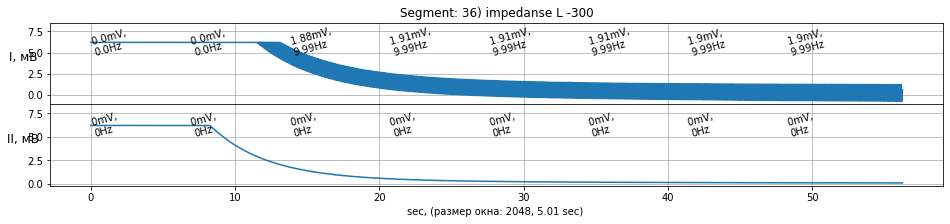

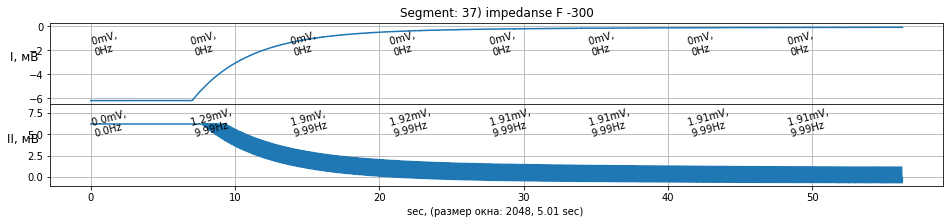

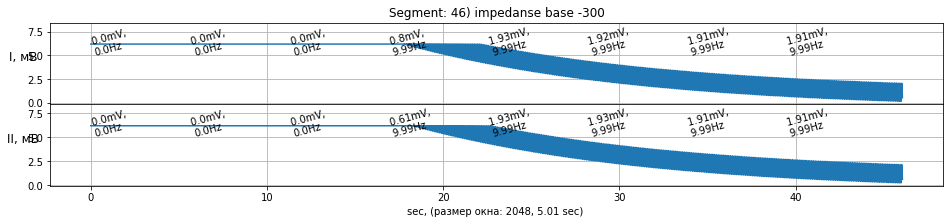

Значения напряжения: [[1.903, 1.907], [1.907, 1.913], [1.902, 1.908], [1.897, 1.904], [1.908, 1.915], [1.906, 1.913]]
Полученные входные сопротивления: [282, 205, 222, 175, 174, 172]


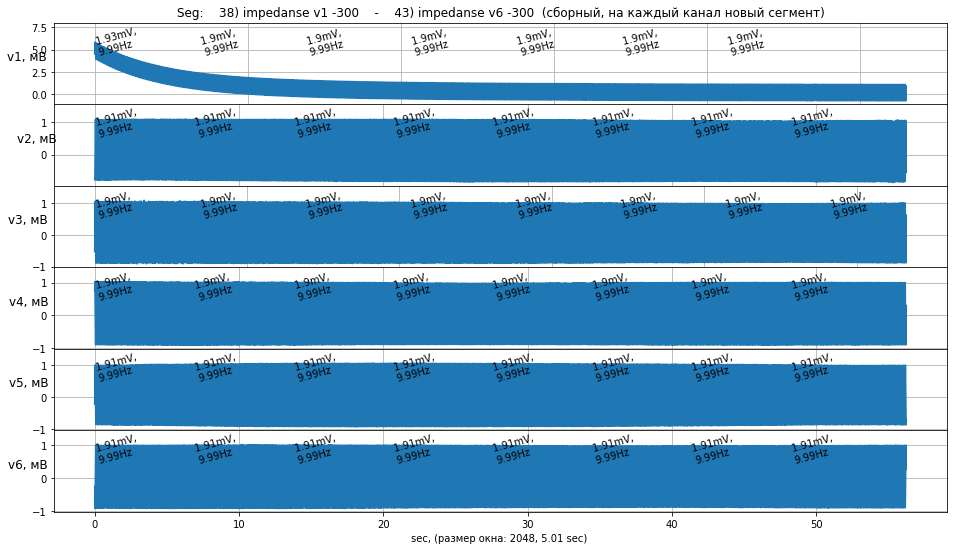

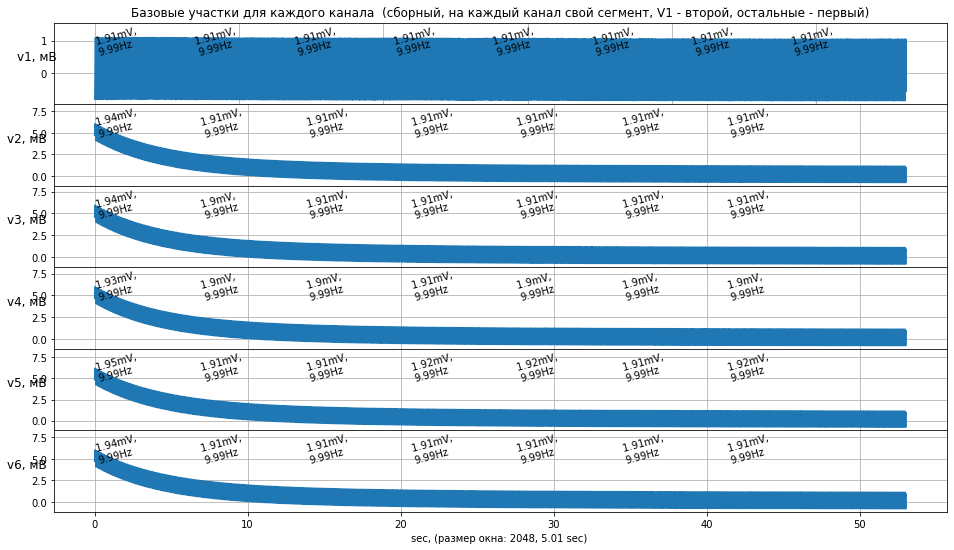

In [36]:
# Входные сопротивления -300 мВ
values_std, spikes_std = impedanse_12_std(testing_record, n_seg = 35, plot_base=True)
values_v1_v6, spikes_v1_v6 = impedanse_12_v1_v6(testing_record, n_seg = 38, plot_base=True)

values = values_std + values_v1_v6
spikes = (spikes_v1_v6 or spikes_std)
passed_test = np.prod(np.abs(np.array(values)) > 50)==1
tests_rezult_pd.loc[12] = [ 'Impedanse test -300 mV', passed_test  , values, spikes]

## Результаты 

In [37]:
tests_rezult_pd

Test_name  Passed_test  \
0                   Nose test        False   
1              Amp test 50 uV         True   
2              Amp test 10 mV         True   
3      Amp test 10 mV +300 mV         True   
4      Amp test 10 mV -300 mV         True   
5     frequency response 5 Hz         True   
6   frequency response 50 mHz        False   
7   frequency response 100 Hz        False   
8                    ECG test        False   
9                 Doptok_test         True   
10             Impedanse test         True   
11     Impedanse test +300 mV         True   
12     Impedanse test -300 mV         True   

                                      Returned_values Spikes  
0   [0.01, 0.013, 0.012, 0.011, 0.31, 0.015, 0.013...   <NA>  
1    [0.05, 0.05, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03]   <NA>  
2    [9.66, 9.68, 9.63, 9.66, 9.64, 9.61, 9.67, 9.66]  False  
3    [9.66, 9.68, 9.64, 9.66, 9.64, 9.62, 9.68, 9.67]  False  
4    [9.66, 9.68, 9.64, 9.66, 9.64, 9.62, 9.68, 9.67]  False  
5    [1.92, 1.92, 1.92, 1.92, 1.92, 1.91, 1.93, 1.92]  False  
6    [1.33, 1.35, 1.34, 1.34, 1.35, 1.34, 1.36, 1.34]  False  
7            [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   <NA>  
8                                                <NA>   <NA>  
9   [[0.09, -0.11], [0.08, -0.05], [0.05, -0.08], ...   <NA>  
10     [346, 143, 1077, 234, 261, 273, 249, 269, 225]  False  
11      [337, 114, 760, 217, 334, 276, 202, 209, 203]  False  
12      [182, 123, 664, 282, 205, 222, 175, 174, 172]  False

---
Не прошли 

In [38]:
tests_rezult_pd[tests_rezult_pd['Passed_test'] == False]

Test_name  Passed_test  \
0                  Nose test        False   
6  frequency response 50 mHz        False   
7  frequency response 100 Hz        False   
8                   ECG test        False   

                                     Returned_values Spikes  
0  [0.01, 0.013, 0.012, 0.011, 0.31, 0.015, 0.013...   <NA>  
6   [1.33, 1.35, 1.34, 1.34, 1.35, 1.34, 1.36, 1.34]  False  
7           [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]   <NA>  
8                                               <NA>   <NA>

---
Выбросы

In [39]:
tests_rezult_pd[tests_rezult_pd['Spikes'] == True]

Empty DataFrame
Columns: [Test_name, Passed_test, Returned_values, Spikes]
Index: []

2) 10 mV std
канал: I


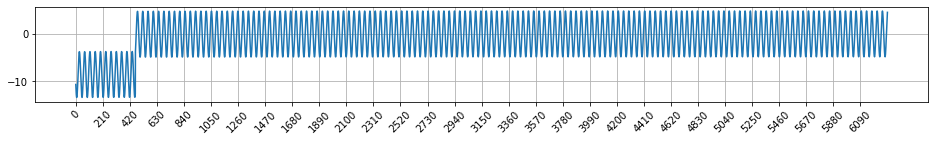

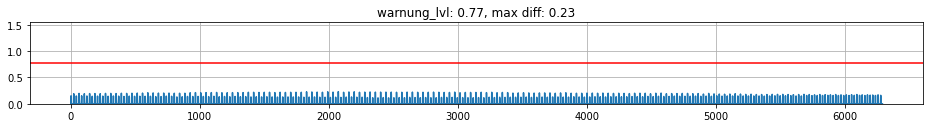

False

In [47]:
n_seg, n_ch = 2,0

print(testing_record.time_limits[n_seg][0])
print('канал:', testing_record.channels[n_ch].name)
testing_record.channels[n_ch].data_split[n_seg].plot_signal()
testing_record.channels[n_ch].data_split[n_seg].check_spike(plot_spike=True)

In [44]:
# for i in range(len(testing_record.seg_with_spike)):    
#     n_seg, n_ch = testing_record.seg_with_spike[i]

#     print(testing_record.time_limits[n_seg][0])
#     print('канал:', testing_record.channels[n_ch].name)
#     testing_record.channels[n_ch].data_split[n_seg].plot_signal()
#     testing_record.channels[n_ch].data_split[n_seg].check_spike(plot_spike=True)
#     print('-------------------------------------------------------------------------------------------')

In [45]:
testing_record.seg_with_spike

[[2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [2, 4],
 [2, 5],
 [2, 6],
 [2, 7],
 [3, 0],
 [3, 1],
 [22, 4],
 [23, 5],
 [24, 6],
 [30, 3]]

In [46]:
time_end = dt.today()
print(f'Время выполнения: {(time_end - time_start).seconds//60}:{(time_end - time_start).seconds%60}')
print('Время конца:     ' ,dt.today().strftime("%H:%M:%S"))

Время выполнения: 43:43
Время конца:      15:47:00
